# Heart Disease prediction using Machine Learning.

## Introduction

Heart diseases is a term covering any disorder of the heart.
Heart attack disorders are regarded as the most common among all fatal diseases

A study shows that from 1990 to 2016 the death rate due to heart diseases have increased around 34 per cent from 155.7 to 209.1 deaths per one lakh population in India.

Thus preventing Heart diseases has become more than necessary.
Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives.
This is where Machine Learning comes into play.
Machine Learning helps in predicting the Heart diseases, and the predictions made are quite accurate.

Problem Description :

A dataset is formed by taking into consideration some of the information of 779 individuals.
The problem is : based on the given information about each individual we have to calculate that whether that individual will suffer from heart disease.

In [1]:
import pandas as pd

from warnings import simplefilter   #import warnings filter

simplefilter(action="ignore", category=FutureWarning)

## Dataset :

The dataset consists of 779 individuals data.
There are 15 columns in the dataset, however the first column name is not a good parameter as far as machine learning is considered so, there are effectively 14 columns.

1.	Age : displays the age of the individual.
2.	Sex : displays the gender of the individual using the following   format : 1 = male
          0 = female.
3.	Chest-pain type : displays the type of chest-pain experienced by the individual using the following format :
           1 = typical angina
           2 = atypical angina
           3 = non - anginal pain
           4 = asymptotic
4.	Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)
5.	Serum Cholestrol : displays the serum cholestrol in mg/dl (unit)
6.	Fasting Blood Sugar : compares the fasting blood sugar value of an individual with 120mg/dl. 
   If fasting blood sugar > 120mg/dl then : 1  (true)
                                else : 0   (false)
7.	Resting ECG : 
              0 = normal
              1 = having ST-T wave abnormality
              2 = left ventricular hyperthrophy
8.	Max heart rate achieved : displays the max heart rate achieved by an individual.
9.	Exercise induced angina : 
              1 = yes
              0 = no
10.	ST depression induced by exercise relative to rest : displays the value which is integer or float.
11.	Peak exercise ST segment : 
              1 = upsloping
              2 = flat
              3 = downsloping
12.	Number of major vessels (0-3) colored by flourosopy : displays the value as integer or float.
13.	Thal : displays the thalassemia : 
              3 = normal
              6 = fixed defect
              7 = reversable defect
14.	Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not : 
              0 = absence
              1,2,3,4 = present.

In [2]:
df = pd.read_csv("cleveland.csv", header=None)
df.columns = [
    "age",
    "sex",
    "cp",
    "trestbps",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "target",
]

### 1 = male, 0 = female
df.isnull().sum()

df["target"] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df["sex"] = df.sex.map({0: "female", 1: "male"})
df["thal"] = df.thal.fillna(df.thal.mean())
df["ca"] = df.ca.fillna(df.ca.mean())


## Data Analysis :

Let us look at the people’s age who are suffering from the disease or not.
Here, target = 1 implies that the person is suffering from heart disease and target = 0 implies the person is not suffering.

In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

%matplotlib inline
rcParams['figure.figsize'] = 10,8
plt.style.use('fivethirtyeight')

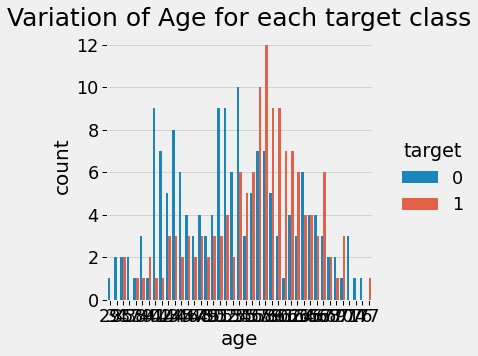

In [4]:
# distribution of target vs age
sns.set_context(
    "paper",
    font_scale=2,
    rc={"font.size": 20, "axes.titlesize": 25, "axes.labelsize": 20},
)
sns.catplot(
    kind="count", data=df, x="age", hue="target", order=df["age"].sort_values().unique()
)
plt.title("Variation of Age for each target class")
plt.show()

We see that most people who are suffering are of the age of 58, followed by 57.
Majorly, people belonging to the age group 50+ are suffering from the disease.

Next, let us look at the distribution of age and gender for each target class.

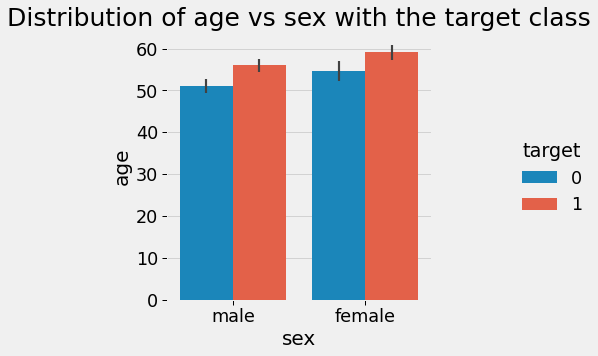

In [5]:
# barplot of age vs sex with hue = target
sns.catplot(kind="bar", data=df, y="age", x="sex", hue="target")
plt.title("Distribution of age vs sex with the target class")
plt.show()

df["sex"] = df.sex.map({"female": 0, "male": 1})

We see that for females who are suffering from the disease are older than males.

## Data Preprocessing :

The dataset contains 14 columns and 303 rows.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


It doesn't contain any null values.

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now let us divide the data in the test and train set.
In this project, the data is divided into an 80: 20 ratio. That is, the training size is 80% and testing size is 20% of the whole data.

## Training :

Different classification models will be applied.

1. SVM
2. Naive Bayes
3. Logistic Regression
4. Decision Tree
5. Random Forest

The evaluation metric used is the confusion matrix.

#### 1. SVM

#### 2. Naive Bayes

#### 3. Logistic Regression

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print(
    "Accuracy for training set for Logistic Regression = {}".format(
        (cm_train[0][0] + cm_train[1][1]) / len(y_train)
    )
)
print(
    "Accuracy for test set for Logistic Regression = {}".format(
        (cm_test[0][0] + cm_test[1][1]) / len(y_test)
    )
)


Accuracy for training set for Logistic Regression = 0.8677685950413223
Accuracy for test set for Logistic Regression = 0.8032786885245902


c:\Users\Kalil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 4. Decision Tree

#### 5. Random Forest

## Conclusions

We see that the highest accuracy for the test set is achieved by Logistic Regression and SVM which is equal to 80.32%.

## Save selected model to disk to deploy on hospital website

In [10]:
import pickle
pickle.dump(classifier, open('model.pkl', 'wb'))